## Convolution Neural Network  [cont....]

### Data Augementation

In [8]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [9]:
dataset = keras.datasets.fashion_mnist

In [10]:
class_names = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Book']

In [11]:
(x_train,y_train),(x_test,y_test) = dataset.load_data()

4422102/4422102 [==============================] - 24s 5us/step


In [12]:
assert x_train.shape == (60000, 28, 28)

In [13]:
x_test.shape

(10000, 28, 28)

In [14]:
y_test.shape

(10000,)

In [15]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

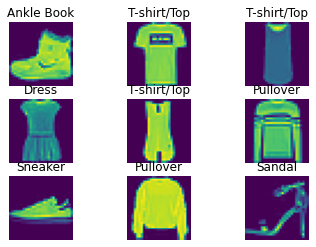

In [35]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis('off')

In [17]:
x_train = x_train/255.0
x_test = x_test/255.0

In [18]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

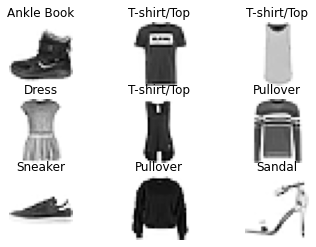

In [33]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i],cmap="Greys")
    plt.title(class_names[y_train[i]])
    plt.axis("off")

In [36]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(64,activation="relu"),
keras.layers.Dense(10,activation="softmax")
])

In [37]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5295 - accuracy: 0.8175
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3985 - accuracy: 0.8579
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3605 - accuracy: 0.8704
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3366 - accuracy: 0.8773
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3194 - accuracy: 0.8832
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3050 - accuracy: 0.8885
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2916 - accuracy: 0.8923
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2818 - accuracy: 0.8954
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2729 - accuracy: 0.9008
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.263

In [40]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3569 - accuracy: 0.8733


[![cnn](https://miro.medium.com/max/3288/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

#### Convolutions are defined by two key parameters:

- **Size of the patches** extracted from the inputs—These are typically 3 × 3 or 5 × 5. In the example, they were 3 × 3, which is a common choice.

- **Depth of the output feature map/ Filters** The number of filters computed by the convolution. The example started with a depth of 32 and ended with a depth of 64.

In [103]:
model = keras.models.Sequential([
keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"),
keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"),
keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
keras.layers.Flatten(),
keras.layers.Dense(64,activation="relu"),
keras.layers.Dense(10,activation="softmax")
])

In [104]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 30976)             0         
                                                                 
 dense_12 (Dense)            (None, 64)              

In [105]:
model.compile(optimizer="adam",loss = 'sparse_categorical_crossentropy',metrics=["accuracy"])

In [106]:
history = model.fit(x_train,y_train,batch_size=28,validation_data=[x_test,y_test],epochs=5,callbacks=keras.callbacks.EarlyStopping(patience=2))

Epoch 1/5
2143/2143 [==============================] - 82s 38ms/step - loss: 0.3751 - accuracy: 0.8655 - val_loss: 0.2944 - val_accuracy: 0.8922
Epoch 2/5
2143/2143 [==============================] - 85s 40ms/step - loss: 0.2419 - accuracy: 0.9100 - val_loss: 0.2538 - val_accuracy: 0.9098
Epoch 3/5
2143/2143 [==============================] - 83s 39ms/step - loss: 0.1938 - accuracy: 0.9281 - val_loss: 0.2486 - val_accuracy: 0.9114
Epoch 4/5
2143/2143 [==============================] - 85s 40ms/step - loss: 0.1590 - accuracy: 0.9414 - val_loss: 0.2402 - val_accuracy: 0.9167
Epoch 5/5
2143/2143 [==============================] - 85s 40ms/step - loss: 0.1291 - accuracy: 0.9520 - val_loss: 0.2562 - val_accuracy: 0.9172


In [108]:
test_loss,test_accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.2562 - accuracy: 0.9172


In [109]:
test_accuracy

0.9172000288963318

In [110]:
test_loss

0.2561942934989929

In [111]:
without_poll = keras.models.Sequential([
keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"),
keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"),
keras.layers.Flatten(),
keras.layers.Dense(64,activation="relu"),
keras.layers.Dense(10,activation="softmax")
])

In [112]:
without_poll.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_24 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 flatten_7 (Flatten)         (None, 36864)             0         
                                                                 
 dense_14 (Dense)            (None, 64)                2359360   
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 2,397,578
Trainable params: 2,397,578
Non-trainable params: 0
_________________________________________________________________


### Data Augementation

In [113]:
datagen = keras.preprocessing.image.ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [ ]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

In [ ]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image
            scale = 1. / size
            
plt.figure(figsize=(scale * display_grid.shape[1],
scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')